In [14]:
# CODTECH Internship Task-1
## Data Pipeline Development with BigBasket Dataset
#Name:** Shaunak Damodar Sinai Kunde  
#Internship:** CodTech IT Solutions Pvt Ltd  
#Task:** Data Preprocessing, Transformation & Loading (ETL) Pipeline

In [15]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib

In [ ]:
# Cell 2: Load Dataset
file_path = r"C://Users//kunde//Desktop//Virtual internship//CodTech IT Solutions Pvt Ltd//CodTech IT Solutions Pvt Ltd Internship//Task-1 Data Pipeline Development for Grocery Dataset//BigBasket Products.csv"
df = pd.read_csv(file_path)

print("Initial Shape:", df.shape)
df.head()

Initial Shape: (27555, 10)


,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [ ]:
# Cell 3: Basic Cleaning
# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill missing values
df.fillna({
    'brand': 'Unknown',
    'category': 'Misc',
    'description': ''
}, inplace=True)

# Check missing after cleaning
df.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              0
sale_price         0
market_price       0
type               0
rating          8626
description        0
dtype: int64

In [ ]:
# Cell 4: Feature Engineering
# Calculate discount values
df['discount'] = df['market_price'] - df['sale_price']
df['discount_pct'] = (df['discount'] / df['market_price'].replace(0, np.nan)) * 100

# Description length as numeric feature
df['description_length'] = df['description'].apply(lambda x: len(str(x).split()))

# Drop raw description (too large for final dataset)
df.drop(columns=['description'], inplace=True)

df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,discount,discount_pct,description_length
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,0.0,0.000000,30
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,0.0,0.000000,52
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,131.0,52.400000,76
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,27.0,15.340909,216
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,0.0,0.000000,74


In [ ]:
# ===============================
# Cell 5: Encoding + Scaling

# Make a copy before encoding (for plots & our readability)
df_viz = df.copy()

# Label Encoding for ML version
label_cols = ['product', 'brand', 'category']
le_dict = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    le_dict[col] = le  # store encoder for later

# Scale numerical cols
scaler = StandardScaler()
num_cols = ['market_price', 'sale_price', 'discount', 'discount_pct', 'description_length']
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Processed Shape:", df.shape)
df.head()

Processed Shape: (27555, 12)


,index,product,category,sub_category,brand,sale_price,market_price,type,rating,discount,discount_pct,description_length
0,1,8277,2,Hair Care,1959,-0.210826,-0.278582,Hair Oil & Serum,4.1,-0.350840,-0.808582,-0.802187
1,2,22935,9,Storage & Accessories,1258,-0.293087,-0.347343,Water & Fridge Bottles,2.3,-0.350840,-0.808582,-0.444580
2,3,2957,4,Pooja Needs,2125,-0.418536,-0.227011,Lamp & Lamp Oil,3.4,0.421055,2.774521,-0.054464
3,4,3573,4,Bins & Bathroom Ware,1386,-0.356840,-0.354220,"Laundry, Storage Baskets",3.7,-0.191747,0.240427,2.221214
4,5,5476,2,Bath & Hand Wash,1455,-0.330105,-0.378286,Bathing Bars & Soaps,4.4,-0.350840,-0.808582,-0.086974


In [ ]:
# Cell 6: Save Processed Data
# Save compressed CSV
df.to_csv("bigbasket_processed.csv.gz", index=False, compression="gzip")

# Save Parquet (preferred)
df.to_parquet("bigbasket_processed.parquet", index=False)

# Save pipeline artifacts
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le_dict, "label_encoders.pkl")

print("✅ Data saved in compressed formats (CSV.GZ + Parquet)")

✅ Data saved in compressed formats (CSV.GZ + Parquet)


C:\Users\kunde\AppData\Local\Temp\ipykernel_22964\1017043093.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product', y='discount_pct', data=top_discounted, palette='viridis')
C:\Users\kunde\AppData\Local\Temp\ipykernel_22964\1017043093.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


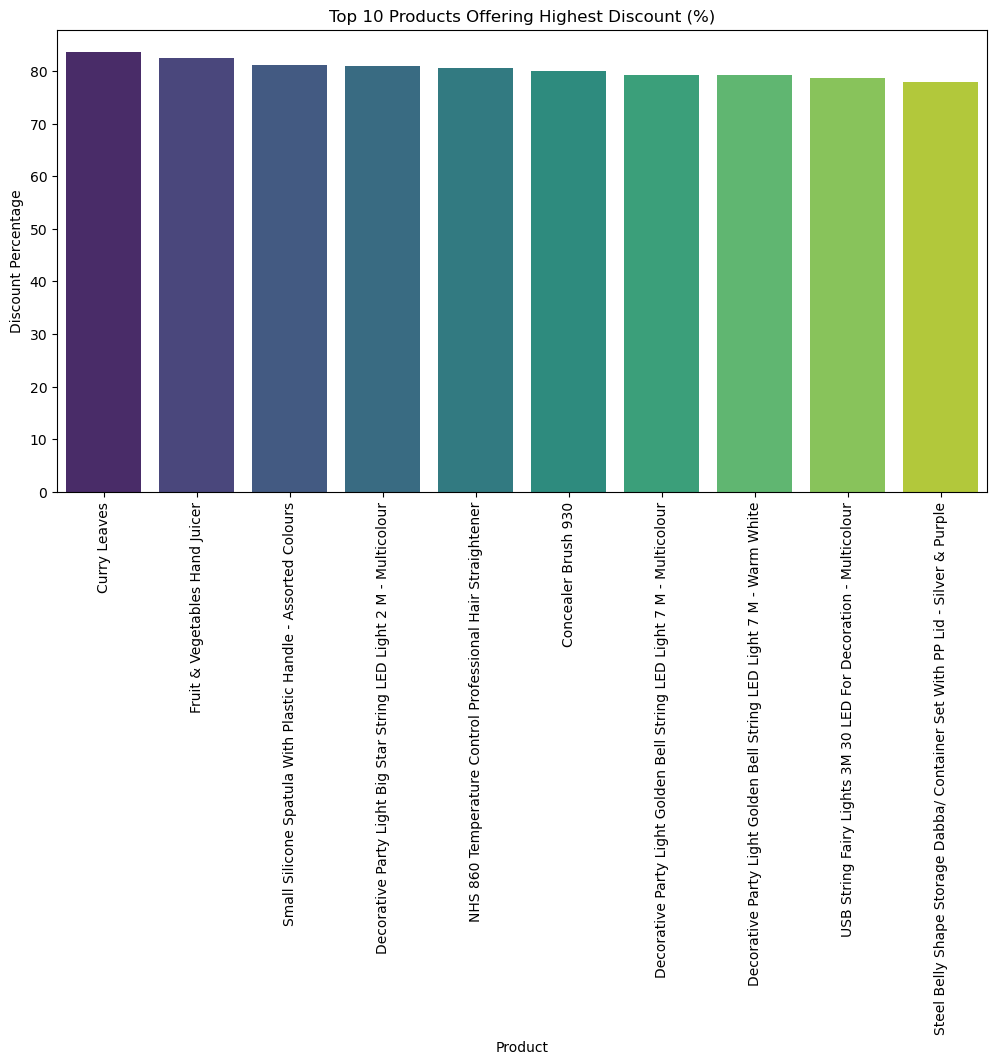

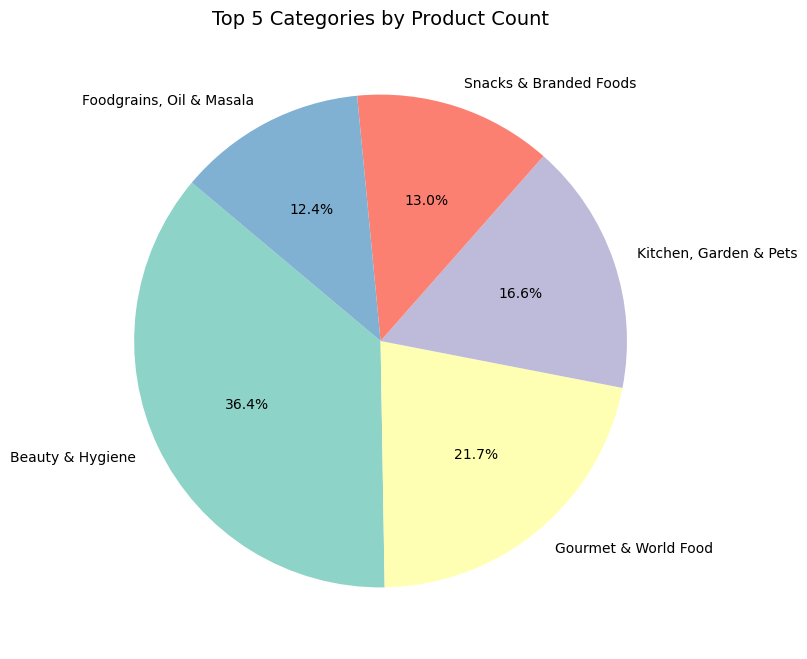

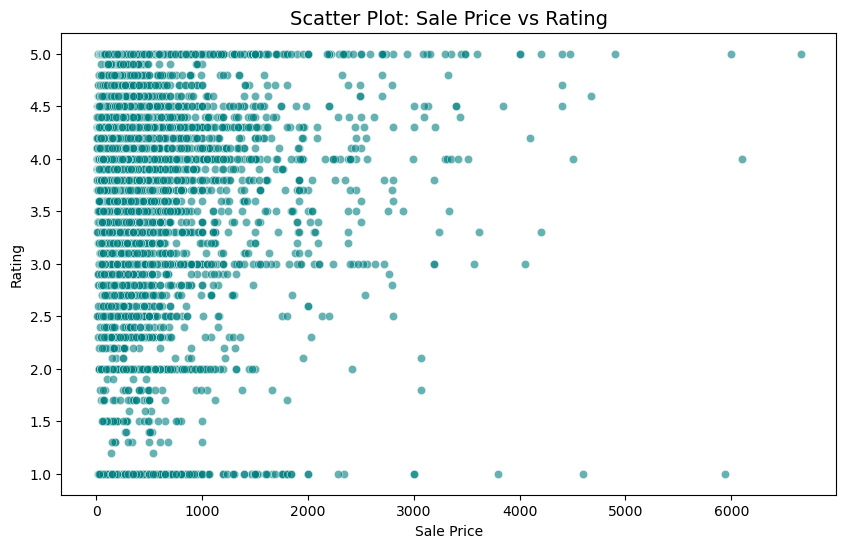

In [36]:
# Cell 7: Exploratory Visualizations
#Top 10 products offering highest discount
top_discounted = df_viz.sort_values(by='discount_pct', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='product', y='discount_pct', data=top_discounted, palette='viridis')
plt.title("Top 10 Products Offering Highest Discount (%)")
plt.xlabel("Product")
plt.ylabel("Discount Percentage")
plt.xticks(rotation=90)   # Rotate product labels vertically
plt.tight_layout()
plt.show()

# Get top 10 categories by product count
top5_categories = df_viz['category'].value_counts().head(5)
# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(
    top5_categories.values,
    labels=top5_categories.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set3", 5)
)
plt.title("Top 5 Categories by Product Count", fontsize=14)
plt.show()

# Scatter plot: Sale Price vs Rating (using original sale_price)
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='sale_price', 
    y='rating', 
    data=df_viz, 
    alpha=0.6, 
    color="teal"
)
plt.title("Scatter Plot: Sale Price vs Rating", fontsize=14)
plt.xlabel("Sale Price")
plt.ylabel("Rating")
plt.show()